### Importing Libraries and Data
This cell:
- Imports necessary libraries like pandas for data manipulation, matplotlib for visualization, and datetime for handling dates.
- Configures pandas display settings to show all rows and columns in the output for better readability.

In [1]:
"""
Author: 
Date: 
"""
# Importing the necessary modules
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Configure pandas display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load purchase data
file_path = "C:/Users/lappy/Downloads/purchase_data.csv"
data = pd.read_csv(file_path, encoding='latin-1')

### Viewing Sample Data
Displaying the first five rows of the dataset to:
- Verify that the data loaded correctly.
- Understand the structure of the dataset, including column names and sample values.

In [2]:
#Display the first five rows of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


### Dataset Overview
Metadata about the dataset, such as:
- Total number of rows and columns.
- Data types of each column.
- Number of non-null values, helping to identify missing data.

In [3]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Insights from `data.info()`
- The dataset contains 541,909 rows and 8 columns.
- The `Description` column has 1,454 missing values. We will check these for any patterns. 
- The `CustomerID` column has a significant number of missing values (135,080 non-null out of 541,909). We might have to check it properly when doing any analyis on customers' behavior. 
- The `InvoiceDate` column is stored as an object and needs to be converted to a `datetime` format for date-based analysis.
- The `CutomerID` column is stored as float and needs to be converted to string as they don't represent a numerical order based value. 

In [4]:
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%d/%m/%Y %H:%M")
# Convert CustomerID to str
data['CustomerID'] = data['CustomerID'].astype('string')

In [5]:
# Displaying rows where Description is null
data[data['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,<NA>,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,<NA>,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,<NA>,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,<NA>,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,<NA>,United Kingdom


It seems that all the rows have no customer info and the unit price is 0. We can also check if any row has blank description value. 

In [6]:
# Check rows where Description is null
null_desc_rows = data[data['Description'].isnull()]

# Verify that all such rows have no info on customer and unitprice
print(f"Total rows with null Description: {len(null_desc_rows)}")
print(f"Null CustomerID: {null_desc_rows['CustomerID'].isnull().sum()}")
print(f"Zero UnitPrice: {(null_desc_rows['UnitPrice'] == 0).sum()}")

# Check if there are any blank descriptions (empty strings)
blank_desc = data[data['Description'].str.strip() == '']
print(f"\nRows with blank descriptions: {len(blank_desc)}")

Total rows with null Description: 1454
Null CustomerID: 1454
Zero UnitPrice: 1454

Rows with blank descriptions: 0


It's confirmed that all the rows have no info customer and unitprice. It suggests that these entries are most likely data entry errors. Let's drop these rows. 

In [7]:
# Count total rows before
pre_cleaned_rows = len(data)

# Remove rows with null descriptions
data = data.dropna(subset=['Description'])

# Count rows after
post_cleaned_rows = len(data)
print(f"Removed {pre_cleaned_rows - post_cleaned_rows} rows")

# Verify no null descriptions remain
print(f"Remaining null descriptions: {data['Description'].isnull().sum()}")

Removed 1454 rows
Remaining null descriptions: 0


### Descriptive Stats for Numerical Columns

In [8]:
# Generate descriptive statistics for numerical columns
numerical_summary = data.describe()
numerical_summary

,Quantity,UnitPrice
count,540455.000000,540455.000000
mean,9.603129,4.623519
std,218.007598,96.889628
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Both Quantity and UnitPrice have negative values. We need to check some samples to understand why it might be so. 

In [9]:
# Filter rows with negative values in Quantity
negative_rows = data[(data['Quantity'] < 0)]
negative_rows.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


All the columns are filled so doesn't look like any data entry issue. These are most likely the return entries. 

In [10]:
# Filter rows with negative values in UnitPrice
negative_rows = data[(data['UnitPrice'] < 0)]
negative_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom


#### Handling Rows with Negative Unit Price
- **Observation**: There are 2 rows in the dataset where the `UnitPrice` is negative, and both rows have missing values in the `CustomerID` column.
- **Description**: The product descriptions suggest these rows are related to accounting restructuring.
- **Action**:
  - Dropping these rows:
    - They do not directly influence revenue or sales.
    - Negative prices are not relevant for analysis unless they signify returns.


In [11]:
# Exclude rows where UnitPrice is negative
data = data[data['UnitPrice'] >= 0]

#### Examining the range of Invoice dates

In [12]:
# Examine the range of dates for InvoiceDate
date_range = (data['InvoiceDate'].min(), data['InvoiceDate'].max())
date_range

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

It starts from Dec 1, 2010 and ends at Dec 9, 2011. 
This implies that the last month's data might be incomplete which would affect later time series analysis.

In [13]:
# Extract MonthYear for grouping
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

# Group by MonthYear and count unique days
unique_days_per_month = data.groupby(data['MonthYear'].dt.to_timestamp())['InvoiceDate'].apply(
    lambda x: x.dt.normalize().nunique()
).reset_index()
unique_days_per_month

,MonthYear,InvoiceDate
0,2010-12-01,20
1,2011-01-01,24
2,2011-02-01,24
3,2011-03-01,27
4,2011-04-01,21
5,2011-05-01,25
6,2011-06-01,26
7,2011-07-01,26
8,2011-08-01,26
9,2011-09-01,26


 **Observation**: Some months have less number of days than usual on which the transactions happened. It might be due to the fact that the store was closed during holidays. However, Dec 2011 has signinficantly low number of transaction days suggesting that our data is available till then only. 

## Q1: Analyse and compare the monthly fluctuations in total revenue and the number of transactions. Identify any significant anomalies or outliers


#### Defining the Revenue column for further analysis


In [14]:
# Define Revenue column
data['Revenue'] = data['Quantity'] * data['UnitPrice']

### Monthly Revenue and Transaction Analysis

#### Steps:
1. Grouped data by Month-Year to calculate total revenue, transactions, and unique days.
2. Computed Month-over-Month (MoM) changes for revenue and transactions.
3. Calculated daily averages for revenue and transactions.
4. Detected outliers using IQR and anomalies with MoM changes (>50%).
5. Visualizations:
   - Total Revenue and Transaction Count with outliers and anomalies.
   - Revenue and Transactions Per Day with dual axes.


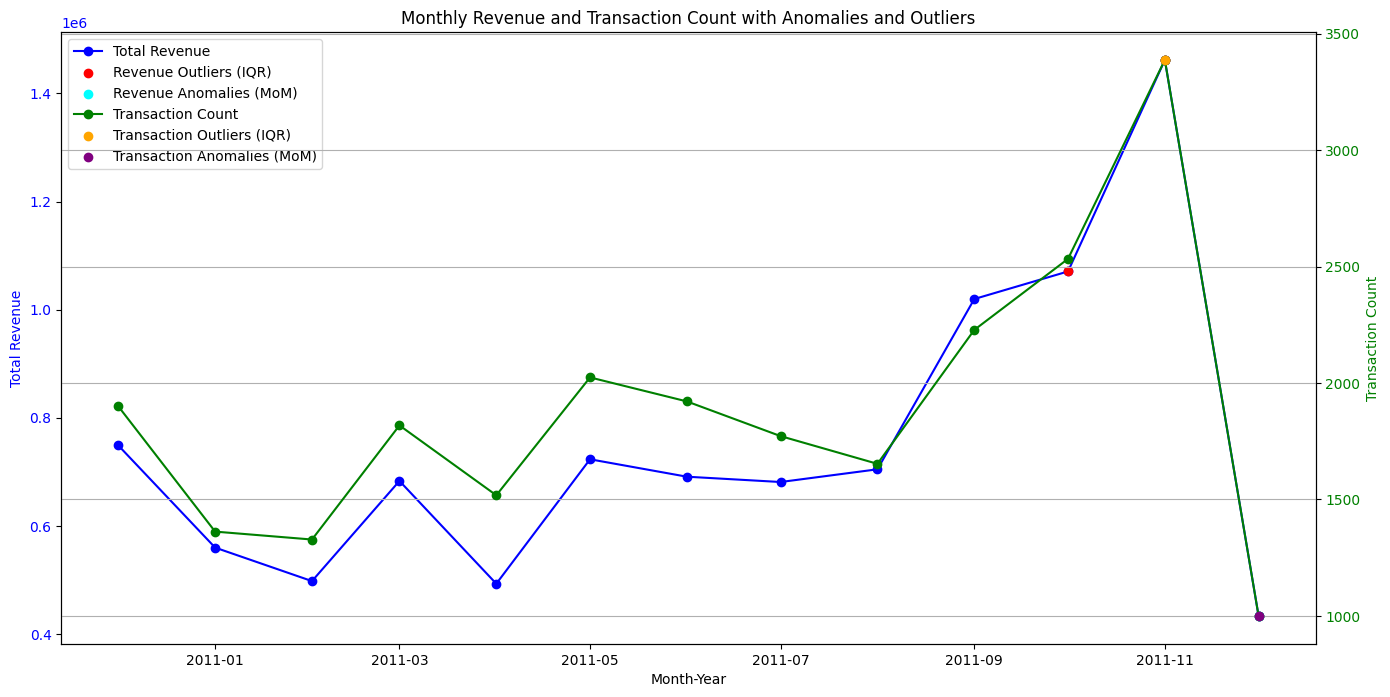

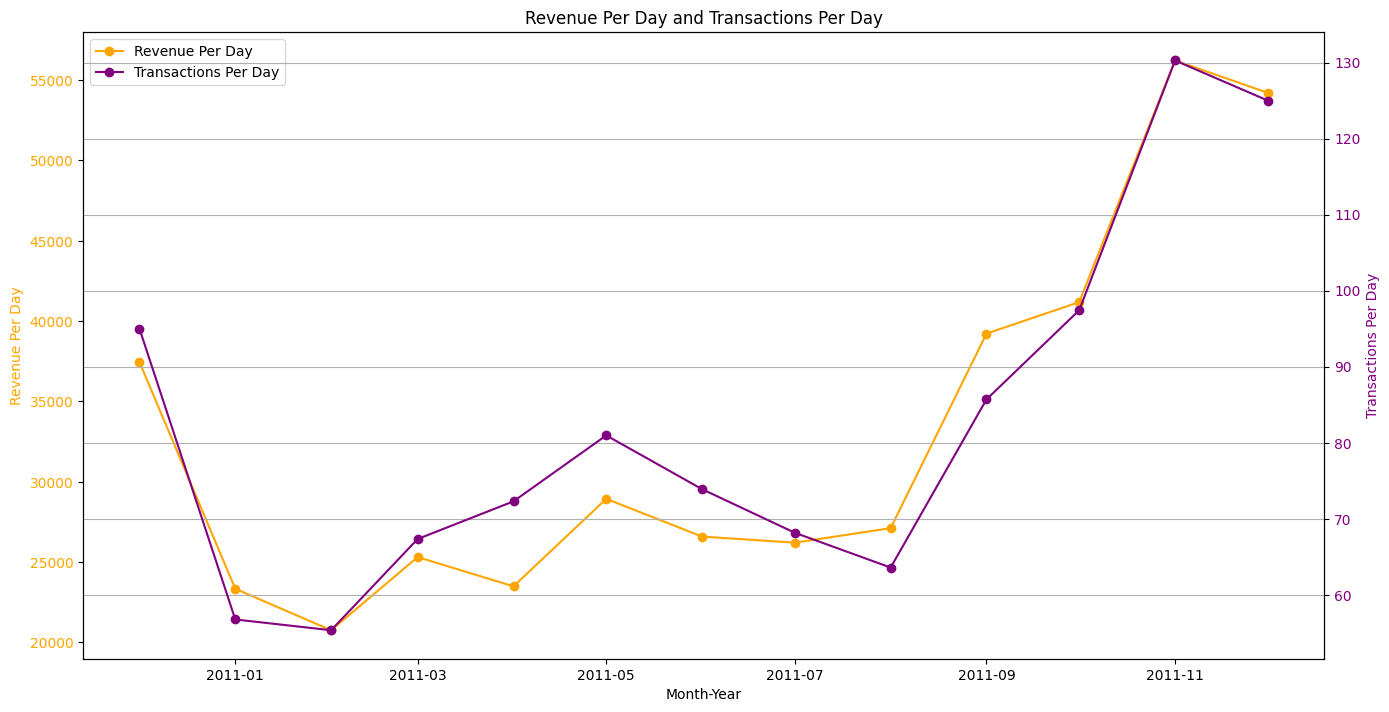

Revenue Anomalies (MoM Changes > 50%):
MonthYear  TotalRevenue  Revenue_MoM_Change
  2011-12     433668.01          -70.332399

Transaction Anomalies (MoM Changes > 50%):
MonthYear  TransactionCount  Transactions_MoM_Change
  2011-12              1000               -70.475347

Revenue Outliers (IQR Method):
 MonthYear  TotalRevenue
2011-10-01    1070704.67
2011-11-01    1461756.25

Transaction Outliers (IQR Method):
 MonthYear  TransactionCount
2011-11-01              3387


In [15]:
# Group data by MonthYear to calculate monthly sales and revenue
monthly_grouped = data.groupby(data['MonthYear']).agg(
    TotalRevenue=('Revenue', 'sum'),
    TransactionCount=('InvoiceNo', 'nunique'),
    DaysOfData=('InvoiceDate', lambda x: x.dt.normalize().nunique())
).reset_index()

# Calculate Month-over-Month changes
monthly_grouped['Revenue_MoM_Change'] = monthly_grouped['TotalRevenue'].pct_change() * 100
monthly_grouped['Transactions_MoM_Change'] = monthly_grouped['TransactionCount'].pct_change() * 100

# Calculate revenue and transactions per unique day
monthly_grouped['Revenue_Per_Day'] = monthly_grouped['TotalRevenue'] / monthly_grouped['DaysOfData']
monthly_grouped['Transactions_Per_Day'] = monthly_grouped['TransactionCount'] / monthly_grouped['DaysOfData']

# Defining a function to detect Outliers based on Inter-Quartile Range
def detect_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Detect outliers using IQR method for Total Revenue and Transaction Count
revenue_outliers_iqr = detect_iqr_outliers(monthly_grouped['TotalRevenue'])
transaction_outliers_iqr = detect_iqr_outliers(monthly_grouped['TransactionCount'])

# Define anomalies using Month-over-Month (MoM) changes with a significant threshold (50%)
revenue_anomalies_mom = monthly_grouped[abs(monthly_grouped['Revenue_MoM_Change']) > 50]
transaction_anomalies_mom = monthly_grouped[abs(monthly_grouped['Transactions_MoM_Change']) > 50]

# Plot 1: Total Revenue and Transaction Count with Dual Axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Total Revenue on the first y-axis
ax1.plot(monthly_grouped['MonthYear'].dt.to_timestamp(), monthly_grouped['TotalRevenue'], label='Total Revenue', marker='o', color='blue')
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Total Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Highlight Revenue Outliers and Anomalies
ax1.scatter(monthly_grouped.loc[revenue_outliers_iqr.index, 'MonthYear'].dt.to_timestamp(),
            revenue_outliers_iqr, color='red', label='Revenue Outliers (IQR)', zorder=5)
ax1.scatter(revenue_anomalies_mom['MonthYear'].dt.to_timestamp(), revenue_anomalies_mom['TotalRevenue'], color='cyan', label='Revenue Anomalies (MoM)', zorder=5)

# Plot Transaction Count on the second y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_grouped['MonthYear'].dt.to_timestamp(), monthly_grouped['TransactionCount'], label='Transaction Count', marker='o', color='green')
ax2.set_ylabel('Transaction Count', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Highlight Transaction Outliers and Anomalies
ax2.scatter(monthly_grouped.loc[transaction_outliers_iqr.index, 'MonthYear'].dt.to_timestamp(),
            transaction_outliers_iqr, color='orange', label='Transaction Outliers (IQR)', zorder=5)
ax2.scatter(transaction_anomalies_mom['MonthYear'].dt.to_timestamp(), transaction_anomalies_mom['TransactionCount'], color='purple', label='Transaction Anomalies (MoM)', zorder=5)

# Title and Legends
fig.tight_layout()
plt.title('Monthly Revenue and Transaction Count with Anomalies and Outliers')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot 2: Revenue Per Day and Transactions Per Day with Dual Axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Revenue Per Day on the first y-axis
ax1.plot(monthly_grouped['MonthYear'].dt.to_timestamp(), monthly_grouped['Revenue_Per_Day'], label='Revenue Per Day', marker='o', color='orange')
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Revenue Per Day', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Plot Transactions Per Day on the second y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_grouped['MonthYear'].dt.to_timestamp(), monthly_grouped['Transactions_Per_Day'], label='Transactions Per Day', marker='o', color='purple')
ax2.set_ylabel('Transactions Per Day', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Title and Legends
fig.tight_layout()
plt.title('Revenue Per Day and Transactions Per Day')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Display detected anomalies
revenue_anomalies_combined = revenue_anomalies_mom[['MonthYear', 'TotalRevenue', 'Revenue_MoM_Change']]
transaction_anomalies_combined = transaction_anomalies_mom[['MonthYear', 'TransactionCount', 'Transactions_MoM_Change']]

# Print detected anomalies and outliers clearly
print("Revenue Anomalies (MoM Changes > 50%):")
print(revenue_anomalies_mom[['MonthYear', 'TotalRevenue', 'Revenue_MoM_Change']].to_string(index=False))

print("\nTransaction Anomalies (MoM Changes > 50%):")
print(transaction_anomalies_mom[['MonthYear', 'TransactionCount', 'Transactions_MoM_Change']].to_string(index=False))

print("\nRevenue Outliers (IQR Method):")
print(pd.DataFrame({
    'MonthYear': monthly_grouped.loc[revenue_outliers_iqr.index, 'MonthYear'].dt.to_timestamp(),
    'TotalRevenue': revenue_outliers_iqr.values
}).to_string(index=False))

print("\nTransaction Outliers (IQR Method):")
print(pd.DataFrame({
    'MonthYear': monthly_grouped.loc[transaction_outliers_iqr.index, 'MonthYear'].dt.to_timestamp(),
    'TransactionCount': transaction_outliers_iqr.values
}).to_string(index=False))




### Observations from Outlier and Anomaly Analysis

#### Trend
- The overall trend for both Revenue and Transactions is increasing and both follow a similar pattern which is expected. However, they rose between Jan 2011 to May 2011 and later dipped till August. This suggests that the customers weren't buying much in summer season due to their own experience of low sales from their shops. They might be unloading their leftover stock. 
- After that we see a very steep rise. It suggests that they the retail customers might have started hoarding goods for the upcoming winter and festive months.
- Dec 2011 has a significant drop but that's just because there are only 8 days worth of data. The per-day chart clearly shows that Revenue/Day and Transactions/Day are only slightly lower than Nov 2011. 

#### Revenue and Transaction Outliers (IQR Method)
1. **Revenue Outliers**:
   - **October 2011**: Total Revenue = 1,070,704.67
   - **November 2011**: Total Revenue = 1,461,756.25
   - These months exhibit significantly higher revenues compared to others, likely driven by holiday sales or promotional campaigns.

2. **Transaction Outliers**:
   - **November 2011**: Total Transactions = 3,387
   - November stands out as a period of high sales activity, which aligns with the peak revenue for the same month.

#### Revenue and Transaction Anomalies (MoM Method)
1. **December 2011**:
   - **Revenue**: 433,668.01, with a **MoM drop of -70.33%**.
   - **Transactions**: 1,000, with a **MoM drop of -70.48%**.
   - While these are flagged as anomalies, the observed decline is due to **only 8 days of data** available for December 2011. 
     When normalized using per-day metrics, both revenue and transactions align well with other months, indicating this is not an operational anomaly.

### Conclusion
By combining per-day metrics with total values, we observe that December's flagged anomalies are a result of incomplete data rather than true operational issues. Other identified outliers reflect genuine sales peaks leading to the holiday/winter season.


## Q2: Determine which product categories have the highest total revenue and demonstrate consistent revenue growth trends. Identify any categories with sustained increases in sales.


#### Top Products 

This code calculates the total revenue for each product by grouping data based on `StockCode` and `Description`. It then sorts the products by revenue in descending order and displays the top 10 highest-revenue products.


In [16]:
# Grouping data by StockCode to calculate total revenue for each product category
product_revenue = data.groupby(['StockCode', 'Description'])['Revenue'].sum().reset_index()

# Sorting products by total revenue in descending order
top_products_by_revenue = product_revenue.sort_values(by='Revenue', ascending=False)

top_products_by_revenue.head(10)


,StockCode,Description,Revenue
4780,DOT,DOTCOM POSTAGE,206245.48
1554,22423,REGENCY CAKESTAND 3 TIER,164762.19
3295,47566,PARTY BUNTING,98302.98
4223,85123A,WHITE HANGING HEART T-LIGHT HOLDER,97715.99
4197,85099B,JUMBO BAG RED RETROSPOT,92356.03
2344,23084,RABBIT NIGHT LIGHT,66756.59
4783,POST,POSTAGE,66230.64
1207,22086,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
3956,84879,ASSORTED COLOUR BIRD ORNAMENT,58959.73
3525,79321,CHILLI LIGHTS,53768.06


#### Observations 
- REGENCY CAKESTAND 3 TIER, PARTY BUNTING, etc. are top revenue grossing products. There are multiple light related products in top 10.
- 'DOTCOM POSTAGE' and 'POST' are strange descriptions which probably correspond to the postage charge for a given order. 


### Steps for identifying top revenue products with consistent growth

1. Filter top 10% revenue products.
2. Aggregate monthly revenue for top 10% products.
3. Pivot monthly revenue data.
4. Calculate Month-over-Month (MoM) growth.
5. Count months with positive MoM growth.
7. Identify products with positive growth in at least 8 months.
8. Filter data for consistent growth products.


In [17]:
# Calculate the 90th percentile of revenue across all products
top_10_percent_revenue_threshold = product_revenue['Revenue'].quantile(0.9)

# Filter products with revenue in the top 10%
top_10_percent_products = product_revenue[product_revenue['Revenue'] >= top_10_percent_revenue_threshold]['StockCode'].unique()

# Filter data for top 10% revenue products
filtered_top_10_data = data[data['StockCode'].isin(top_10_percent_products)]

# Aggregate monthly revenue for top 10% revenue products
top_10_monthly = filtered_top_10_data.groupby(['StockCode', 'MonthYear'])['Revenue'].sum().reset_index()

# Pivoting data for top 10% revenue products
top_10_monthly_pivot = top_10_monthly.pivot(index='StockCode', columns='MonthYear', values='Revenue').fillna(0)

# Calculate Month-over-Month (MoM) growth
top_10_mom_growth = top_10_monthly_pivot.pct_change(axis=1).fillna(0)

# Count the number of months with positive MoM growth for each product
top_10_positive_growth_count = (top_10_mom_growth > 0).sum(axis=1)

# Identify products with positive growth in at least 8 months
consistent_top_10_growth_products = top_10_positive_growth_count[top_10_positive_growth_count >= 8].index

# Filter for these consistent growth products in the pivot table
consistent_top_10_growth_data = top_10_monthly_pivot.loc[consistent_top_10_growth_products]

consistent_top_10_growth_data


MonthYear,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
StockCode,,,,,,,,,,,,,
21108,670.44,6870.41,129.21,330.38,86.28,33.01,105.42,126.94,139.55,221.01,605.09,1977.50,182.62
21136,414.19,270.40,518.83,627.00,738.53,827.71,511.29,653.38,322.79,876.72,931.20,974.74,148.33
22139,246.98,769.03,1434.98,1565.14,1160.63,1800.61,1726.47,1883.85,1840.05,1866.64,3058.15,4211.63,1153.35
22170,494.15,513.42,401.73,611.82,348.15,401.94,497.28,544.53,600.54,1043.07,329.91,781.53,290.88
22294,770.68,394.88,402.14,474.80,717.66,827.78,278.75,324.80,406.21,1035.64,528.99,556.78,139.72
22457,2097.26,2398.57,1627.50,2682.15,1995.31,2030.49,1565.28,2271.24,1635.25,2071.60,2352.62,2596.73,2671.36
22551,804.00,2228.51,397.60,1061.09,447.08,733.77,747.55,916.32,927.36,1158.83,1087.80,2647.87,409.68
22557,597.51,984.41,419.67,694.19,356.37,698.52,174.85,328.30,654.53,738.04,756.15,1024.94,305.06
22580,-136.69,0.00,5.68,0.00,0.00,17.85,41.65,214.20,220.15,1083.58,1847.53,2844.74,406.45


### Use rolling average to smooth out the fluctuations in the revenue

1. Apply rolling average smoothing with a 3-month window.
2. Calculate Month-over-Month (MoM) growth on smoothed data.
3. Count months with positive MoM growth for each product.
4. Identify products with positive growth in at least 8 months.
5. Filter data for consistent growth products based on smoothed revenue.


In [18]:
# Apply rolling average smoothing with a 3-month window
rolling_avg_revenue = top_10_monthly_pivot.rolling(window=3, axis=1).mean()

# Calculate Month-over-Month (MoM) growth on smoothed data
rolling_avg_mom_growth = rolling_avg_revenue.pct_change(axis=1).fillna(0)

# Count the number of months with positive MoM growth for each product
rolling_avg_positive_growth_count = (rolling_avg_mom_growth > 0).sum(axis=1)

# Identify products with positive growth in at least 7 out of 8 months based on smoothed data
consistent_rolling_avg_growth_products = rolling_avg_positive_growth_count[rolling_avg_positive_growth_count >= 8].index

# Filter for these consistent growth products in the smoothed pivot table
consistent_rolling_avg_growth_data = rolling_avg_revenue.loc[consistent_rolling_avg_growth_products]

consistent_rolling_avg_growth_data


MonthYear,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
StockCode,,,,,,,,,,,,,
20723,NaN,NaN,659.140000,772.556667,815.746667,924.243333,869.370000,944.543333,1074.570000,1159.186667,1198.376667,1247.503333,1091.356667
21174,NaN,NaN,385.073333,397.200000,445.776667,518.820000,587.076667,706.093333,683.113333,973.136667,1046.110000,1298.460000,1033.940000
22086,NaN,NaN,3124.473333,133.426667,66.330000,79.743333,306.033333,678.766667,1000.016667,2698.423333,5484.810000,14769.510000,15057.713333
22109,NaN,NaN,509.940000,171.830000,230.070000,511.550000,551.460000,568.336667,258.640000,325.603333,467.183333,752.316667,834.536667
22139,NaN,NaN,816.996667,1256.383333,1386.916667,1508.793333,1562.570000,1803.643333,1816.790000,1863.513333,2254.946667,3045.473333,2807.710000
22193,NaN,NaN,486.580000,622.093333,715.600000,731.466667,800.920000,889.640000,841.596667,1372.083333,1520.106667,1654.726667,980.183333
22197,NaN,NaN,2077.426667,2211.913333,2212.510000,3221.286667,2780.016667,2794.846667,2454.460000,3076.403333,4159.656667,7439.363333,8052.456667
22727,NaN,NaN,1489.266667,1164.826667,1797.303333,1811.300000,1938.193333,1253.680000,1728.276667,2180.883333,3296.326667,3840.896667,4170.916667
23077,NaN,NaN,0.000000,226.186667,586.510000,856.913333,844.683333,961.843333,972.413333,1285.376667,1399.643333,2479.370000,2192.343333


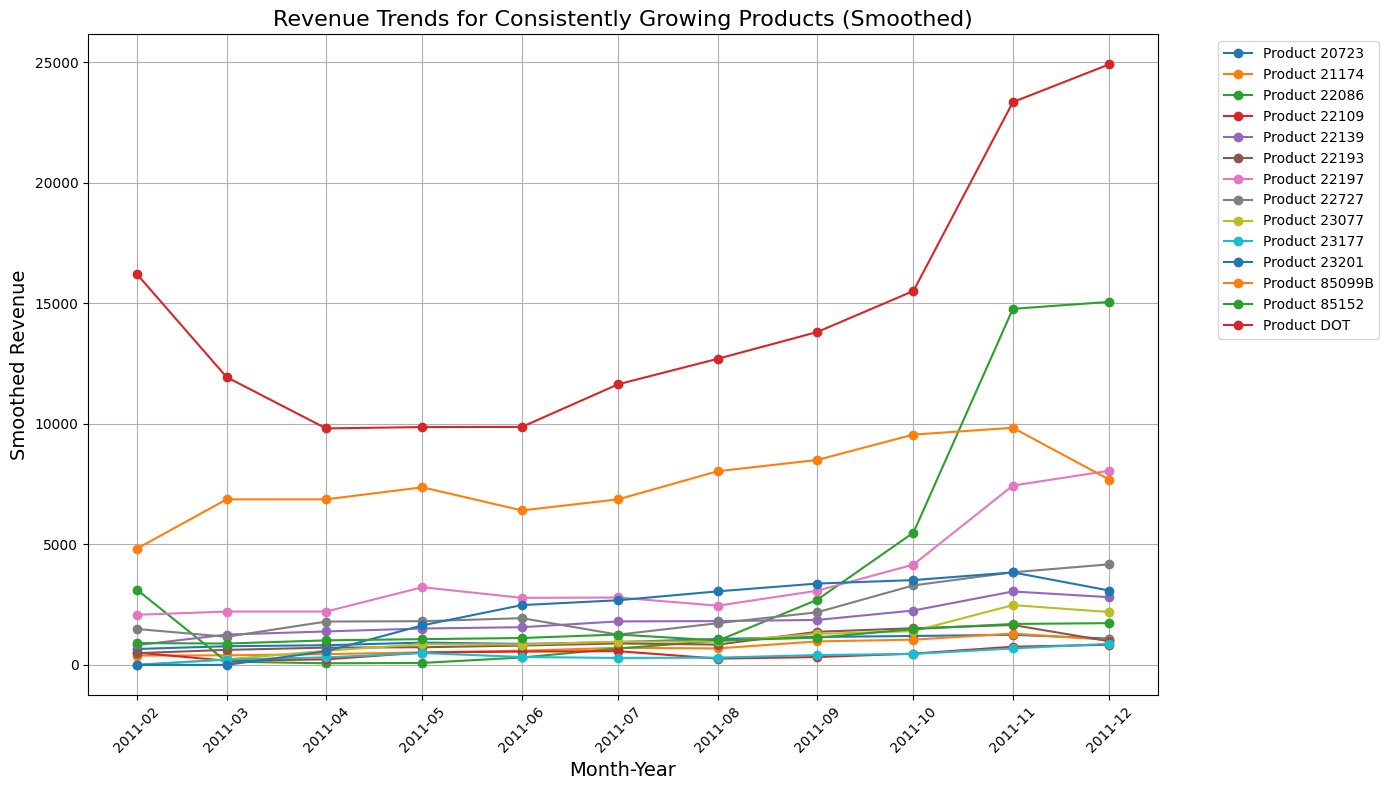

In [19]:
# Adjust threshold to only include products with at least 8 months of positive growth
final_consistent_products = rolling_avg_positive_growth_count[rolling_avg_positive_growth_count >= 8].index
final_consistent_data = rolling_avg_revenue.loc[final_consistent_products]

# Plot all consistent products on a single chart
plt.figure(figsize=(14, 8))

for product in final_consistent_data.index:
    plt.plot(
        final_consistent_data.columns.to_timestamp(),
        final_consistent_data.loc[product],
        marker='o',
        label=f"Product {product}"
    )

plt.title("Revenue Trends for Consistently Growing Products (Smoothed)", fontsize=16)
plt.xlabel("Month-Year", fontsize=14)
plt.ylabel("Smoothed Revenue", fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc="upper left", fontsize=10, bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


### Adding the mapping from StockCode to Description

1. Map `StockCode` to their most common product description.
2. Update labels with descriptions for consistent products.
3. Plot revenue trends for consistently growing products with smoothed data.


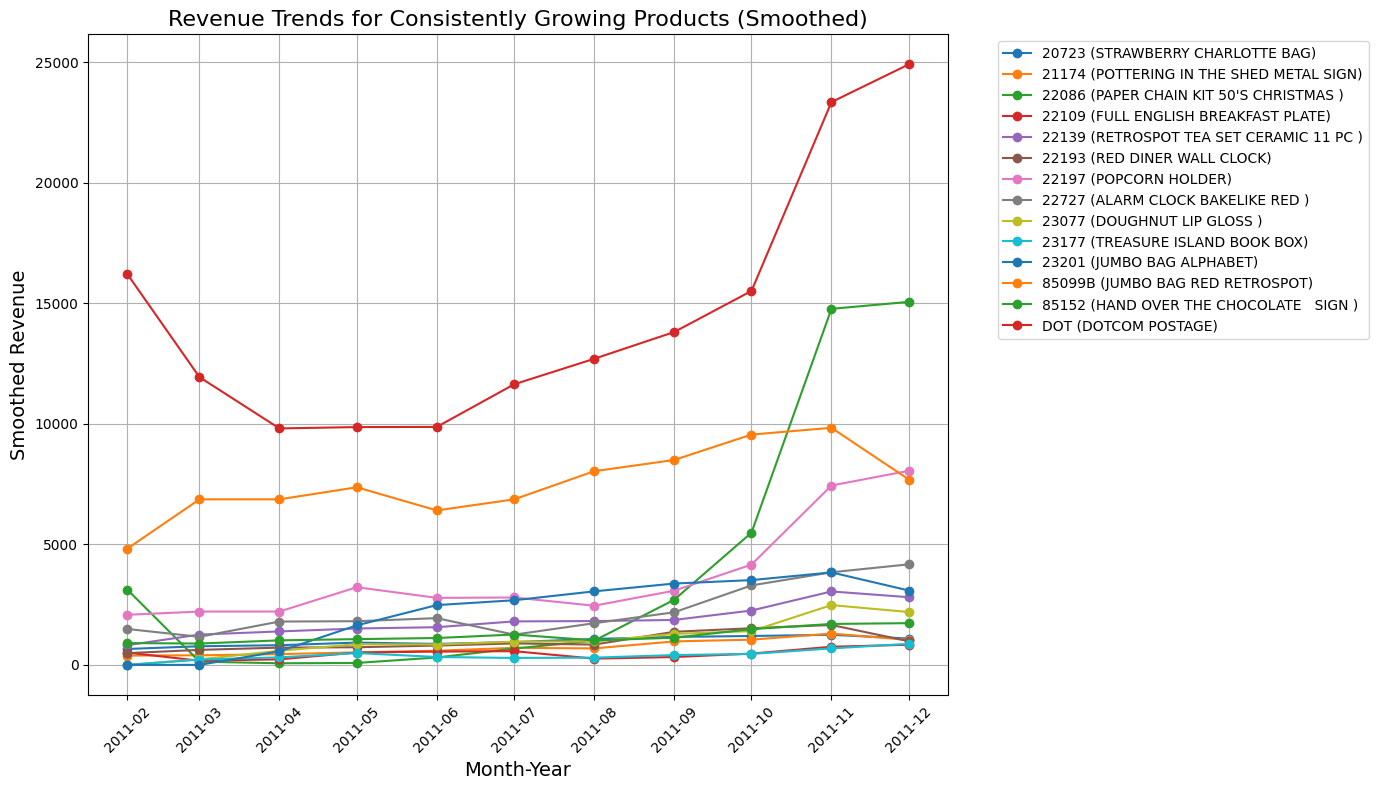

In [20]:
# Map StockCode to their most common description
most_common_descriptions = (
    data.groupby('StockCode')['Description']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'No Description')
    .to_dict()
)

# Update the labels with descriptions
labels_with_descriptions = [
    f"{product} ({most_common_descriptions.get(product, 'No Description')})"
    for product in final_consistent_data.index
]

# Plot all consistent products with descriptions in the chart
plt.figure(figsize=(14, 8))

for product, label in zip(final_consistent_data.index, labels_with_descriptions):
    plt.plot(
        final_consistent_data.columns.to_timestamp(),
        final_consistent_data.loc[product],
        marker='o',
        label=label
    )

plt.title("Revenue Trends for Consistently Growing Products (Smoothed)", fontsize=16)
plt.xlabel("Month-Year", fontsize=14)
plt.ylabel("Smoothed Revenue", fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc="upper left", fontsize=10, bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations

- DOTCOM POSTAGE is consistently growing. However, it might not quality as a product category.
- PAPER SWITCH KIT 50'S CHRISTMAS seems to be growing rapidly. However, it's most likely cyclic and would have come as such had we more years to look at.
- There are two JUMBO BAG products, POPCORN HOLDER, etc. which have consistently grown in revenue. 


### Products with sustained sales (quantity) growth

1. Calculate total sales (quantity) for all products by month-year.
2. Pivot data to create a table with products as rows, months-years as columns, and quantities as values.
3. Apply a 3-month rolling average smoothing to the pivoted data.
4. Calculate Month-over-Month (MoM) growth on smoothed sales data.
5. Count months with positive MoM growth for each product.
6. Identify products with sustained positive growth in at least 75% of their active months.
7. Filter data for sustained growth products.
8. Map product descriptions to the selected products.
9. Plot sales trends for sustained growth products with smoothed data.


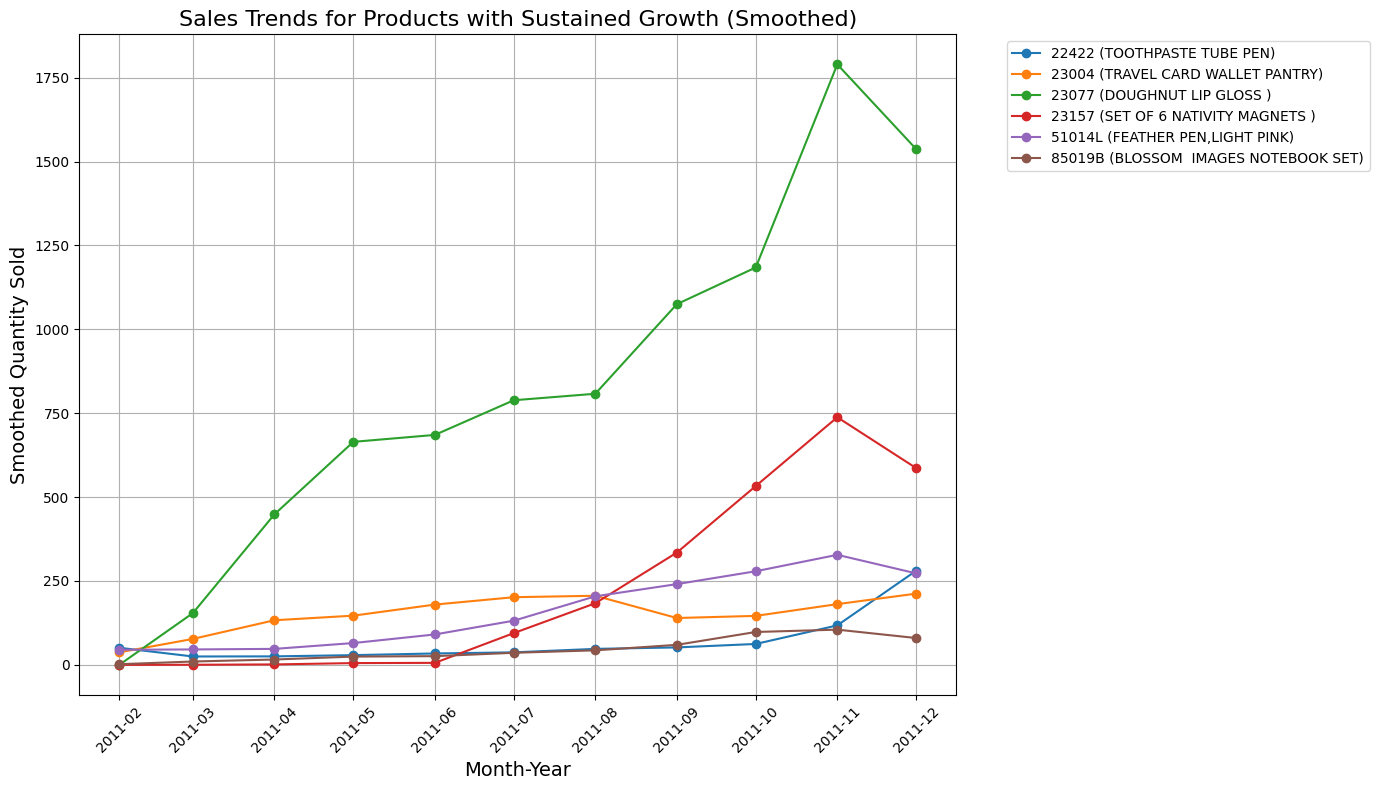

In [21]:
# Calculate total sales (quantity) for all products
all_quantity_monthly = data.groupby(['StockCode', 'MonthYear'])['Quantity'].sum().reset_index()

# Pivot data to get products as rows, months-years as columns, and sales (quantity) as values
all_quantity_monthly_pivot = all_quantity_monthly.pivot(index='StockCode', columns='MonthYear', values='Quantity').fillna(0)

# Apply rolling average smoothing with a 3-month window
rolling_avg_all_quantity = all_quantity_monthly_pivot.rolling(window=3, axis=1).mean()

# Calculate Month-over-Month (MoM) growth on smoothed data
rolling_avg_all_quantity_mom_growth = rolling_avg_all_quantity.pct_change(axis=1).fillna(0)

# Count the number of months with positive MoM growth for each product
sustained_growth_count = (rolling_avg_all_quantity_mom_growth > 0).sum(axis=1)

# Identify products with sustained positive growth for the majority of their active months
# Here, we use at least 80% of months with positive growth as the threshold
threshold_growth = rolling_avg_all_quantity.notna().sum(axis=1) * 0.75
sustained_growth_products = sustained_growth_count[sustained_growth_count >= threshold_growth].index

# Filter for these sustained growth products in the smoothed pivot table
sustained_growth_data = rolling_avg_all_quantity.loc[sustained_growth_products]

# Map descriptions for the selected products
labels_with_sustained_descriptions = [
    f"{product} ({most_common_descriptions.get(product, 'No Description')})"
    for product in sustained_growth_data.index
]

# Plot all sustained growth sales products with descriptions in the chart
plt.figure(figsize=(14, 8))

for product, label in zip(sustained_growth_data.index, labels_with_sustained_descriptions):
    plt.plot(
        sustained_growth_data.columns.to_timestamp(),
        sustained_growth_data.loc[product],
        marker='o',
        label=label
    )

plt.title("Sales Trends for Products with Sustained Growth (Smoothed)", fontsize=16)
plt.xlabel("Month-Year", fontsize=14)
plt.ylabel("Smoothed Quantity Sold", fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc="upper left", fontsize=10, bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations

- There are 6 products which have grown in sales in at least 75% of the months they have been sold
- Doughnut Lip Gloss and Nativity Magnets are two products which stand out. They have grown significantly each month.
- Feather Pen, Light Pink too has grown every month but its volume is lower as compare to the previously mentioned products. 


## Q3. Explore the seasonal variations in sales for different product categories. Are there any categories that are sensitive to specific time periods?

### Steps

1. Define categories and their associated keywords in a dictionary.
2. Create a function to assign categories to products based on keywords in their description.
3. Assign a category to each product in the dataset using the function.
4. Extract the date part from `InvoiceDate` to calculate unique days per month.
5. Calculate total sales (quantity) for each product, month, and category.
6. Merge unique days data into the monthly sales dataset.
7. Compute average sales per day for each product and month.
8. Group data by month and category to calculate average daily sales.
9. Pivot the data to prepare it for plotting.
10. Plot trends in average daily sales across all categories over time. 

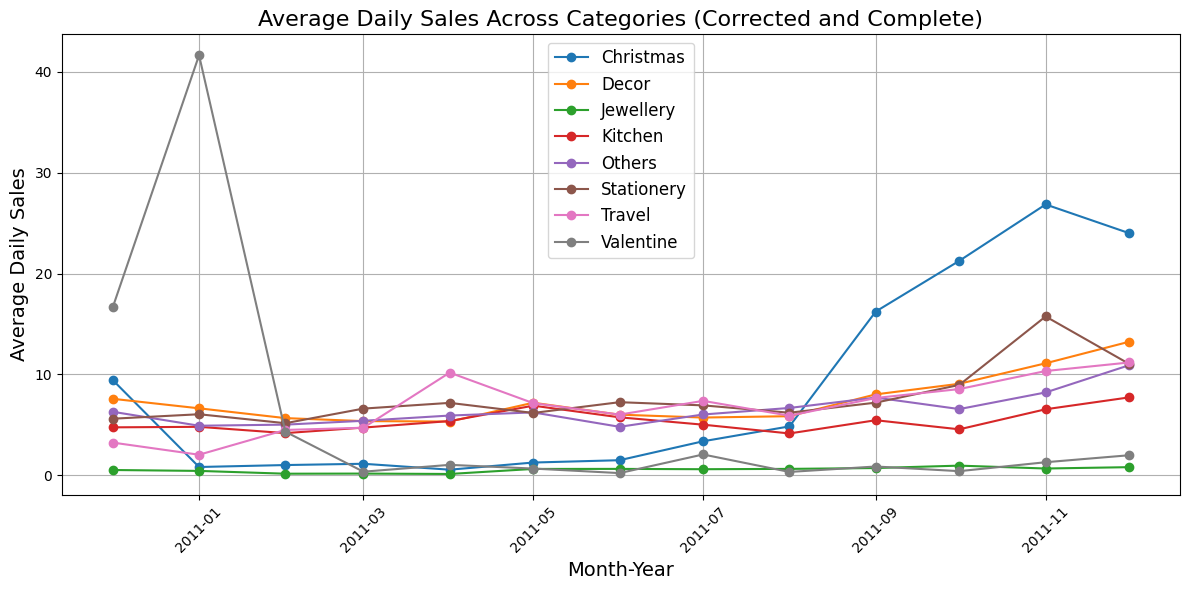

In [22]:
# Define a dictionary for categories and their respective keywords
category_keywords = {
    'Christmas': ['Christmas', 'Xmas', 'Santa', 'Tree'],
    'Valentine': ['Valentine'],
    'Travel': ['Travel', 'Luggage', 'Fridge Magnet'],
    'Kitchen': ['Plate', 'Bowl', 'Cup', 'Mug','Diner','Dinner'],
    'Decor': ['Decor','Light','Art'],
    'Jewellery': ['Jewel', 'Necklace', 'Bracelet','Earrings'],
    'Stationery': ['Notebook', 'Pen', 'Paper', 'Stationery', 'Pencil', 'Notebook'],
    'Other': []  # Default category for products not matching any keywords
}

# Function to label categories based on keywords
def assign_category(description, categories):
    for category, keywords in categories.items():
        if any(keyword.lower() in str(description).lower() for keyword in keywords):
            return category
    return "Others"

# Assign categories to products based on the dictionary
data['Category'] = data['Description'].apply(lambda desc: assign_category(desc, category_keywords))

# Ensure the date part of InvoiceDate is used for unique days calculation
data['InvoiceDateDateOnly'] = data['InvoiceDate'].dt.date  # Extract the date part

# Calculate unique days per month based on the date part only
unique_days_per_month = data.groupby(['MonthYear'])['InvoiceDateDateOnly'].nunique().reset_index()
unique_days_per_month.columns = ['MonthYear', 'UniqueDays']

# Calculate total sales (Quantity) for each product and month
monthly_sales = data.groupby(['StockCode', 'MonthYear', 'Category'])['Quantity'].sum().reset_index()

# Merge unique days into monthly sales
monthly_sales = pd.merge(monthly_sales, unique_days_per_month, on=['MonthYear'])

# Calculate average sales per day for each product and month
monthly_sales['AvgSalesPerDay'] = monthly_sales['Quantity'] / monthly_sales['UniqueDays']

# Group by MonthYear and Category to calculate average daily sales
category_avg_daily_sales = monthly_sales.groupby(['MonthYear', 'Category'])['AvgSalesPerDay'].mean().reset_index()

# Pivot the data for plotting
category_avg_daily_sales_pivot = category_avg_daily_sales.pivot(index='MonthYear', columns='Category', values='AvgSalesPerDay').fillna(0)

# Plot the trends for all categories
plt.figure(figsize=(12, 6))

for category in category_avg_daily_sales_pivot.columns:
    plt.plot(
        category_avg_daily_sales_pivot.index.to_timestamp(),
        category_avg_daily_sales_pivot[category],
        marker='o',
        label=category
    )

plt.title("Average Daily Sales Across Categories (Corrected and Complete)", fontsize=16)
plt.xlabel("Month-Year", fontsize=14)
plt.ylabel("Average Daily Sales", fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations

- Products related to Christmas consistently grow approaching the festive season, which is expected.
- There is just one Valentile containing product and it's only bought in January month.
- Travel related products see a small spike in April. It might be correspond to the travel season in UK which is in the summer months.
- The other categories don't show much seasonality. Although, we would need multiple years of data to really ascertain this statement.  


## Q4. Analyse shifts in customer purchasing behaviour across multiple transactions to identify recurring patterns or significant changes in preferences. Determine whether these trends can provide actionable insights for enhancing the company's marketing strategy.

Dropping the rows with no info on CustomerID as this whole analysis is cutomer centric. 

In [23]:
data_cleaned = data[~data['CustomerID'].isnull()]
data_cleaned.shape

(406829, 12)

#### First Purchase Month Cohort Analysis

C:\Users\lappy\AppData\Local\Temp\ipykernel_25516\1287375832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['FirstPurchaseMonth'] = data_cleaned.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')


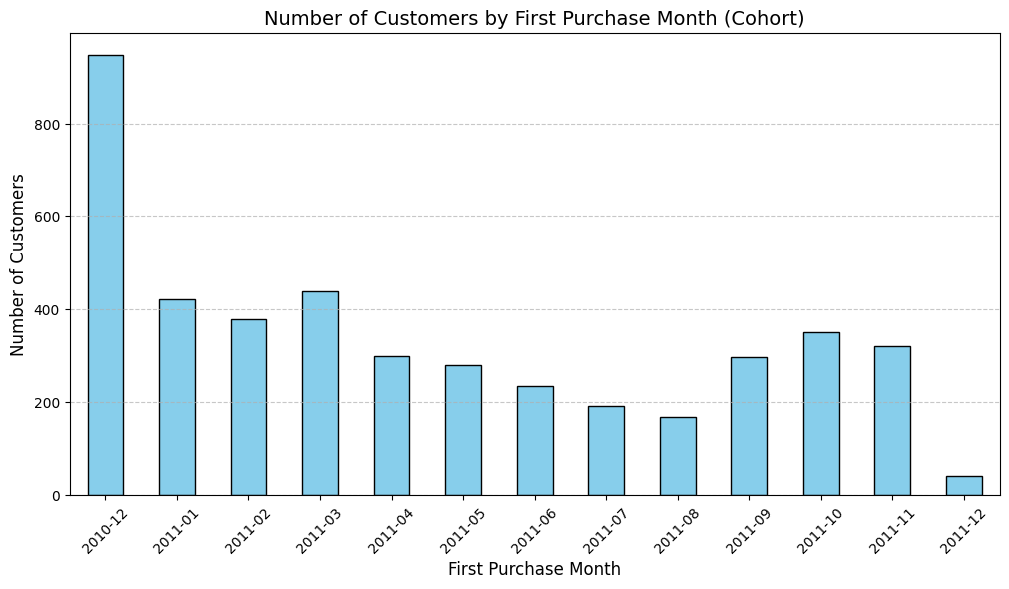

FirstPurchaseMonth
2010-12    948
2011-01    421
2011-02    380
2011-03    440
2011-04    299
2011-05    279
2011-06    235
2011-07    191
2011-08    167
2011-09    298
2011-10    352
2011-11    321
2011-12     41
Freq: M, Name: CustomerID, dtype: int64

In [24]:
# Cohort Analysis - Grouping Customers by Their First Purchase Month
data_cleaned['FirstPurchaseMonth'] = data_cleaned.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

# Count the number of customers in each cohort (FirstPurchaseMonth)
cohort_customers = data_cleaned.groupby('FirstPurchaseMonth')['CustomerID'].nunique()

# Visualize the cohort size over time
plt.figure(figsize=(12, 6))
cohort_customers.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Customers by First Purchase Month (Cohort)', fontsize=14)
plt.xlabel('First Purchase Month', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

cohort_customers


#### Initial Findings:
- The largest cohort is from December 2010, with 948 customers making their first purchase. They too might be repeat customers but since the data starts
from here, we will treat them as new. 
- There is a general decline in the number of new customers across months, especially after March 2011 onwards.

#### Seasonality Impact:
- A noticeable increase in the number of new customers from September 2011, due to seasonal/festive demand.
- The significant dip in December 2011 is due to incomplete data in that month.

#### Retention Potential:
-Large cohorts like December 2010 and January 2011 represent key customer groups. Understanding how these cohorts behave over time can highlight retention patterns.

#### Cohort Retention Analysis

C:\Users\lappy\AppData\Local\Temp\ipykernel_25516\2094025016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['MonthYear'] = data_cleaned['InvoiceDate'].dt.to_period('M')


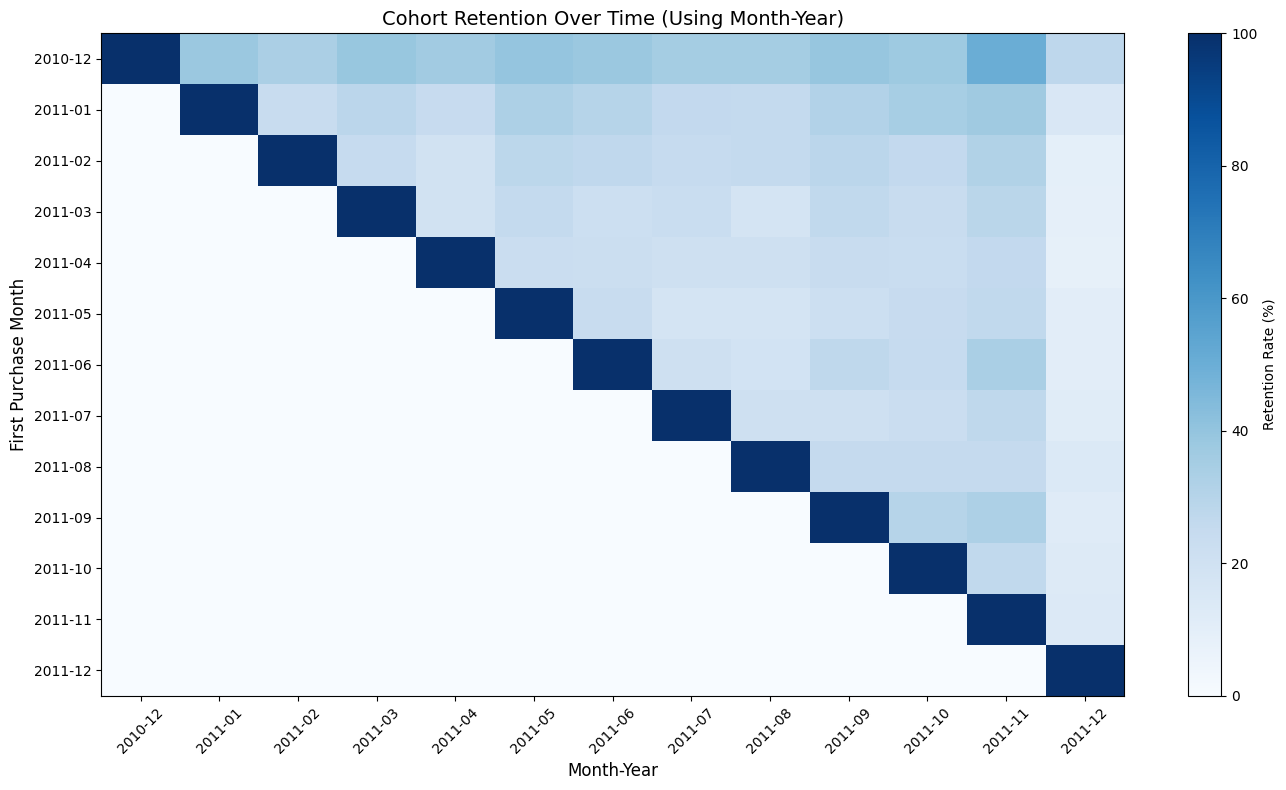

MonthYear,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
FirstPurchaseMonth,,,,,,,,,,,,,
2010-12,100.0,38.185654,33.438819,38.713080,35.970464,39.662447,37.974684,35.443038,35.443038,39.451477,37.341772,50.000000,27.426160
2011-01,0.0,100.000000,23.990499,28.266033,24.228029,32.779097,29.928741,26.128266,25.653207,31.116390,34.679335,36.817102,14.964371
2011-02,0.0,0.000000,100.000000,24.736842,19.210526,27.894737,26.842105,24.736842,25.526316,28.157895,25.789474,31.315789,9.210526
2011-03,0.0,0.000000,0.000000,100.000000,19.090909,25.454545,21.818182,23.181818,17.727273,26.363636,23.863636,28.863636,8.863636
2011-04,0.0,0.000000,0.000000,0.000000,100.000000,22.742475,22.073579,21.070234,20.735786,23.745819,23.076923,26.086957,8.361204
2011-05,0.0,0.000000,0.000000,0.000000,0.000000,100.000000,23.655914,17.204301,17.204301,21.505376,24.372760,26.523297,10.394265
2011-06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,20.851064,18.723404,27.234043,24.680851,33.617021,10.212766
2011-07,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,20.942408,20.418848,23.036649,27.225131,11.518325
2011-08,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,25.149701,25.149701,25.149701,13.772455


In [25]:
# Ensure MonthYear is in a consistent format
data_cleaned['MonthYear'] = data_cleaned['InvoiceDate'].dt.to_period('M')

# Group by FirstPurchaseMonth and MonthYear to count unique customers per cohort per month
monthly_cohort = data_cleaned.groupby(['FirstPurchaseMonth', 'MonthYear'])['CustomerID'].nunique().unstack(fill_value=0)

# Find the first non-zero value for each cohort
first_month_customers = monthly_cohort.apply(lambda row: row[row > 0].iloc[0], axis=1)

# Calculate retention percentages by dividing each value by the cohort's first non-zero value
cohort_retention = monthly_cohort.div(first_month_customers, axis=0) * 100

# Visualize cohort retention using matplotlib heatmap
plt.figure(figsize=(14, 8))
plt.imshow(cohort_retention, cmap='Blues', aspect='auto', interpolation='nearest')
plt.colorbar(label='Retention Rate (%)')
plt.title('Cohort Retention Over Time (Using Month-Year)', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('First Purchase Month', fontsize=12)
plt.xticks(ticks=range(len(cohort_retention.columns)), labels=cohort_retention.columns.astype(str), rotation=45)
plt.yticks(ticks=range(len(cohort_retention.index)), labels=cohort_retention.index.astype(str))
plt.tight_layout()
plt.show()

# Display the retention DataFrame for reference
cohort_retention


### Cohort Retention Analysis

#### **Key Observations**

1. **First Cohort (December 2010):**
   - Initial retention is 100%, as expected, in the first month.
   - Retention steadily declines in subsequent months, with a notable drop to 38.19% in January 2011 and stabilising in the range of 30-40% before a temporary peak at 50% in November 2011.
   - This increase is due to the upcoming festive season.

2. **Subsequent Cohorts (January 2011 and Later):**
     - A steep decline follows in the subsequent months but unlike the Dec 2010 cohort, they stabilise between 20-25%.
     - The increase during November 2011 is not as much as it happened for the December 2010 cohort.

#### **Insights**

- It's likely that the high retention that is seen for Dec 2010 cohort is simply due to them appearing as the first month in our data. They might have shopped before as well.
- The sharp increase in retention of the Dec 2010 cohort does suggest that a signinficant proportion return during festive season if they have shopped before during the same season. 




#### Analysis of customer spending trend

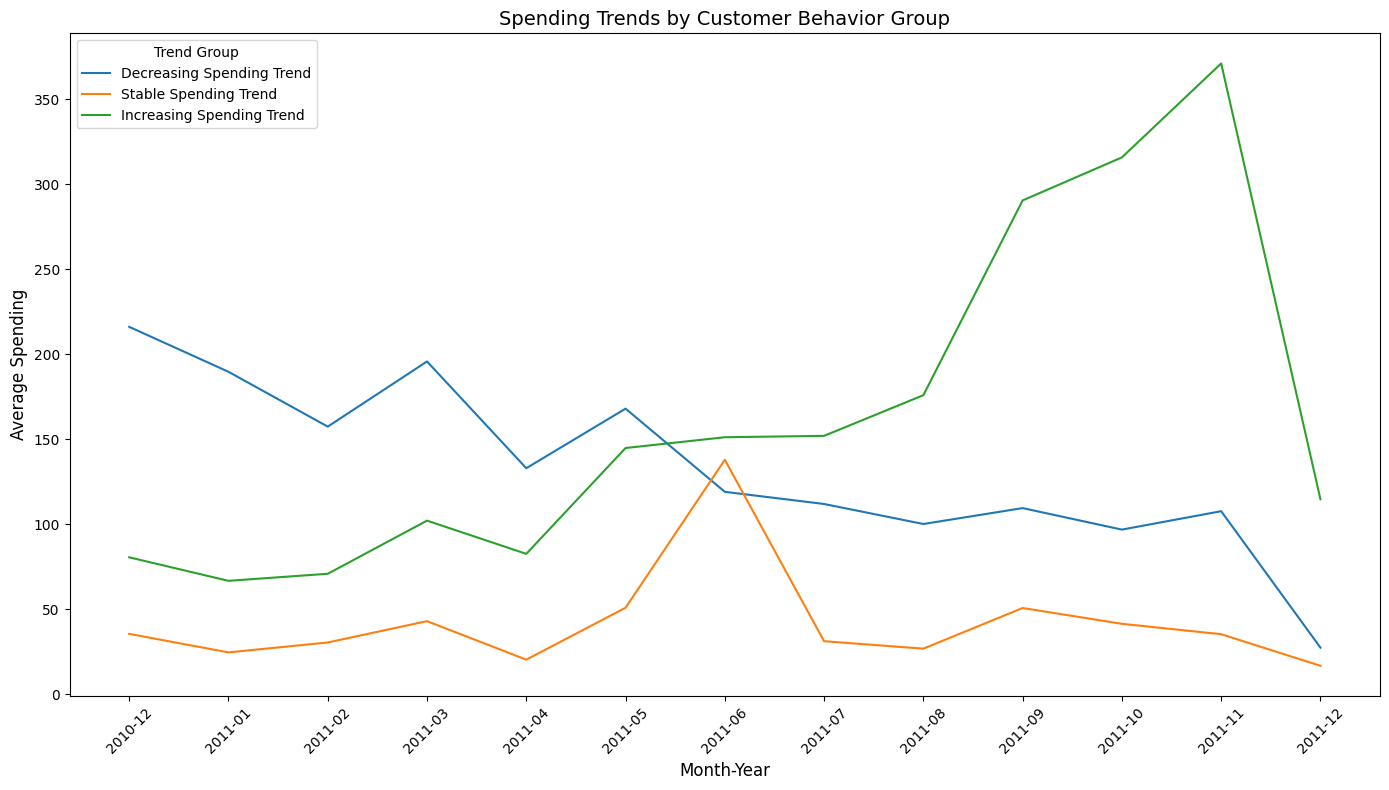

MonthYear,TrendSlope,TrendGroup
CustomerID,,
12346.0,0.000000,Stable
12347.0,-1.231703,Decreasing
12348.0,-34.604396,Decreasing
12349.0,48.284341,Increasing
12350.0,-7.349451,Decreasing
12352.0,7.451154,Increasing
12353.0,-0.489011,Stable
12354.0,-11.861538,Decreasing
12355.0,-2.524176,Decreasing


In [26]:
# Calculate Monthly Spending for Each Customer
monthly_spending = data.groupby(['CustomerID', 'MonthYear'])['Revenue'].sum().unstack(fill_value=0)

# Calculate Spending Trend Slope for Each Customer
from scipy.stats import linregress

def calculate_slope(row):
    x = range(len(row))  # Time periods as x-axis
    y = row.values  # Spending values as y-axis
    slope, _, _, _, _ = linregress(x, y) if len(set(y)) > 1 else (0, 0, 0, 0, 0)  # Handle flat lines
    return slope

monthly_spending['TrendSlope'] = monthly_spending.apply(calculate_slope, axis=1)

# Segment Customers Based on Spending Trend
bins = [-float('inf'), -0.5, 0.5, float('inf')]  # Decreasing, Stable, Increasing
labels = ['Decreasing', 'Stable', 'Increasing']
monthly_spending['TrendGroup'] = pd.cut(monthly_spending['TrendSlope'], bins=bins, labels=labels)

# Aggregate Spending Trends by Trend Group
trend_group_spending = monthly_spending.groupby('TrendGroup').mean().drop(columns=['TrendSlope'])

# Visualize Spending Trends for Each Group
plt.figure(figsize=(14, 8))
for group in trend_group_spending.index:
    plt.plot(trend_group_spending.columns.astype(str), trend_group_spending.loc[group], label=f"{group} Spending Trend")

plt.title('Spending Trends by Customer Behavior Group', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Spending', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Trend Group')
plt.tight_layout()
plt.show()

# Display segmented customer data for reference
monthly_spending[['TrendSlope', 'TrendGroup']].head(10)


# **Observations and Insights from Spending Trends by Customer Behavior Group**

## **Observations**

1. **Decreasing Spending Trend Group:**
   - Customers in this group started with relatively **high average spending** (around 200) in December 2010.
   - Their spending consistently declined over time, showing slight fluctuations in the middle months.
   - By December 2011, the average spending for this group had dropped significantly, stabilizing at a much lower level.

2. **Stable Spending Trend Group:**
   - This group maintained **low and consistent spending levels** throughout the observed period.
   - There is a slight increase in average spending during mid-2011 (peaking around June), but it quickly returned to lower levels.
   - Overall, their behavior indicates minimal engagement or growth potential.

3. **Increasing Spending Trend Group:**
   - This group began with **moderate average spending** in December 2010, similar to the Stable group.
   - Their spending displayed **consistent growth** throughout the year, with a sharp increase starting mid-2011.
   - By December 2011, their average spending peaked at over 350, making them the most valuable segment in terms of growth potential.



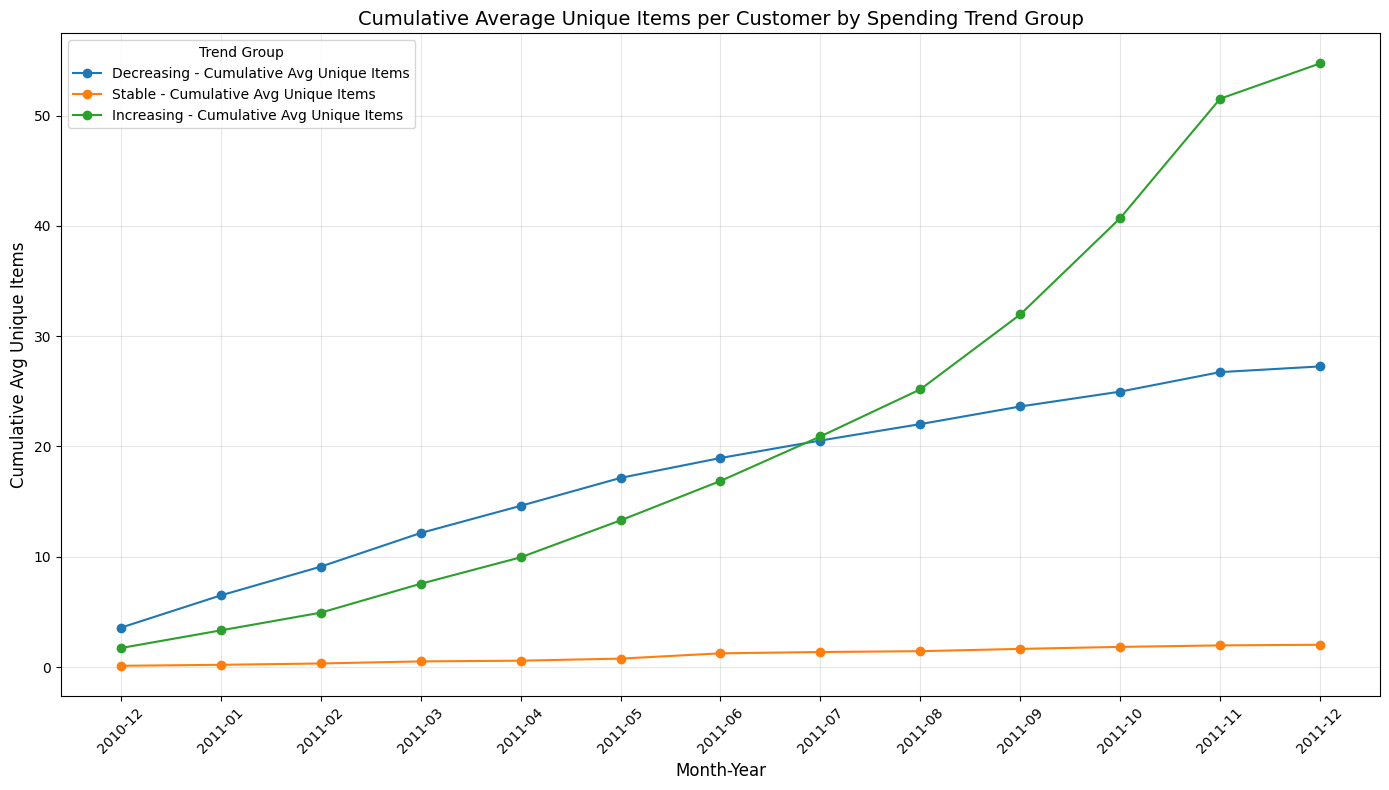

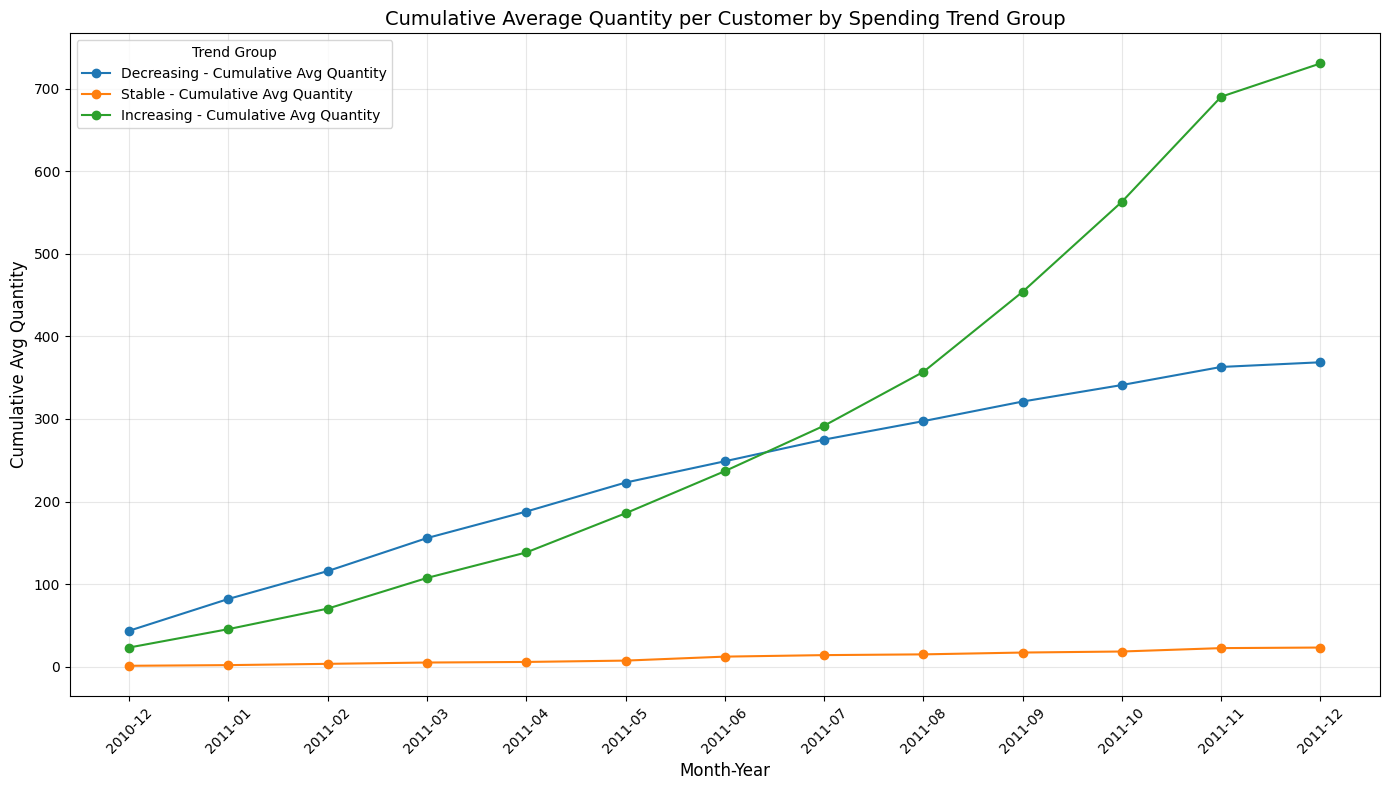

In [27]:
# Step 1: Merge TrendGroup into Main Dataset
# Ensure `customer_trends` is created by extracting TrendGroup from monthly spending
customer_trends = monthly_spending[['TrendGroup']].reset_index()  # CustomerID and TrendGroup
data_with_trend = pd.merge(data, customer_trends, on='CustomerID', how='inner')

# Step 2: Calculate Monthly Average Unique Items and Quantity for Each TrendGroup
monthly_avg = data_with_trend.groupby(['TrendGroup', 'MonthYear', 'CustomerID']).agg(
    unique_items_per_customer=('StockCode', 'nunique'),  # Unique items per customer
    quantity_per_customer=('Quantity', 'sum')  # Total quantity per customer
).reset_index()

# Aggregate to get average unique items and quantities for each trend group by month
trend_monthly_avg = monthly_avg.groupby(['TrendGroup', 'MonthYear']).agg(
    avg_unique_items=('unique_items_per_customer', 'mean'),  # Average unique items per customer
    avg_quantity=('quantity_per_customer', 'mean')  # Average quantity per customer
).reset_index()

# Step 3: Calculate Cumulative Averages for Each TrendGroup
trend_monthly_avg['cumulative_avg_unique_items'] = trend_monthly_avg.groupby('TrendGroup')['avg_unique_items'].cumsum()
trend_monthly_avg['cumulative_avg_quantity'] = trend_monthly_avg.groupby('TrendGroup')['avg_quantity'].cumsum()

# Step 4: Plot Cumulative Average Unique Items
plt.figure(figsize=(14, 8))
for trend in trend_monthly_avg['TrendGroup'].unique():
    trend_data = trend_monthly_avg[trend_monthly_avg['TrendGroup'] == trend]
    plt.plot(
        trend_data['MonthYear'].astype(str),
        trend_data['cumulative_avg_unique_items'],
        marker='o',
        label=f"{trend} - Cumulative Avg Unique Items"
    )

plt.title('Cumulative Average Unique Items per Customer by Spending Trend Group', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Cumulative Avg Unique Items', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Trend Group', loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Step 5: Plot Cumulative Average Quantity
plt.figure(figsize=(14, 8))
for trend in trend_monthly_avg['TrendGroup'].unique():
    trend_data = trend_monthly_avg[trend_monthly_avg['TrendGroup'] == trend]
    plt.plot(
        trend_data['MonthYear'].astype(str),
        trend_data['cumulative_avg_quantity'],
        marker='o',
        label=f"{trend} - Cumulative Avg Quantity"
    )

plt.title('Cumulative Average Quantity per Customer by Spending Trend Group', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Cumulative Avg Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Trend Group', loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# **Observations and Suggestions for Marketing Strategy**

## **Observations**

1. **Increasing Trend Group:**
   - This group shows a **rapid cumulative growth in average quantity** over time.
   - Their buying behavior indicates higher engagement and increased purchasing frequency, making them a valuable segment.

2. **Decreasing Trend Group:**
   - While cumulative growth is present, the pace is **much slower compared to the Increasing group**.
   - These customers appear to be disengaging or reducing their purchase volume over time.

3. **Stable Trend Group:**
   - This group shows **minimal growth in cumulative quantity** over time.
   - Their purchasing behavior remains constant with low activity, indicating a lack of engagement or loyalty.

4. **Unique Items (Similar Observation):**
   - Increasing trend customers likely diversify their purchases (buying new products) over time.
   - Stable and Decreasing groups show limited growth in product diversity, reflecting stagnant or declining interest.

---

## **Suggestions for Marketing Strategy**

1. **Focus on the Increasing Group:**
   - These are **high-value customers** who are actively increasing their purchasing behavior.
   - **Strategies:**
     - Offer personalized recommendations based on their past purchases.
     - Provide loyalty rewards to encourage further growth.
     - Highlight new products or categories to maintain their engagement.

2. **Re-engage the Decreasing Group:**
   - These customers show potential but are disengaging over time.
   - **Strategies:**
     - Send win-back campaigns with personalized discounts or offers.
     - Analyze their past behavior to identify barriers (e.g., price sensitivity, product availability).
     - Provide incentives to reintroduce them to frequently purchased products.

3. **Activate the Stable Group:**
   - This group is underperforming and requires strategies to drive engagement.
   - **Strategies:**
     - Run targeted promotions (e.g., limited-time discounts or bundles).
     - Offer free samples of new or complementary products.
     - Use messaging to build awareness of other product categories.

4. **Introduce Seasonal Campaigns:**
   - Use the identified trends to time **seasonal offers** that align with the purchasing cycles of the Increasing and Decreasing groups.
   - **Examples:**
     - Holiday campaigns for Increasing customers to capitalize on their momentum.
     - Re-engagement campaigns for Decreasing customers before peak seasons.

---

## **Actionable Insights**
1. **High-Value Customers:** Focus on retaining and nurturing the Increasing group as they show significant long-term potential.
2. **Reactivation Campaigns:** Invest in understanding the Decreasing group’s decline and implement targeted campaigns to win them back.
3. **Diversification:** Encourage all groups, particularly Stable and Decreasing, to explore diverse product categories.
4. **Product Recommendations:** Leverage data on unique item growth to recommend similar or complementary products to customers.

---
